<a href="https://colab.research.google.com/github/lugsantistebanji/WCS-IA/blob/main/WCS_IA_Quetes_ML_Standardize_your_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Execute the code below

In [23]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [24]:
url = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/spotify.zip"
df_music = pd.read_csv(url)
df_zoom = df_music.loc[df_music.genre.isin(['Country', 'Classical']), ['genre', 'duration_ms', 'speechiness']].reset_index(drop = True)
df_zoom

,genre,duration_ms,speechiness
0,Country,200013,0.0444
1,Country,208187,0.0569
2,Country,123360,0.0960
3,Country,238600,0.0368
4,Country,243000,0.0330
...,...,...,...
17915,Country,179147,0.0322
17916,Country,230400,0.0832
17917,Country,216093,0.0268
17918,Country,179947,0.0909


# Standardization and classification

You now have a dataset with Country and Classical musics, and 2 numerical features : duration and speechiness.
Our goal will be to predict genre from numerical features.

## Draw a scatterplot from df_zoom with
- 'duration_ms' on X axis
- 'speechiness' on Y axis
- 'genre' in hue

<Axes: xlabel='duration_ms', ylabel='speechiness'>

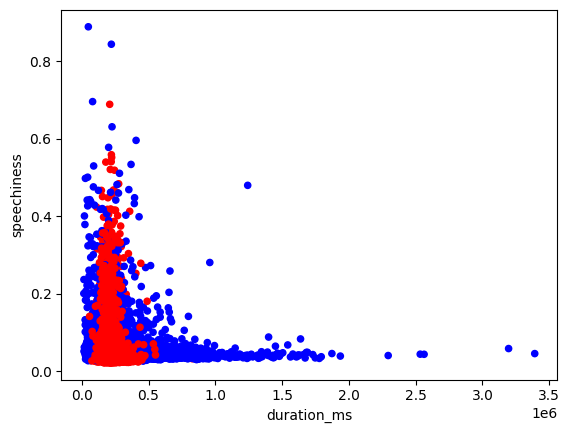

In [25]:
# Your code here :
colors = df_zoom['genre'].apply(lambda x: 'red' if x == 'Country' else 'blue')

df_zoom.plot.scatter(x='duration_ms', y='speechiness', c=list(colors), legend=True)

## Classification
From df_zoom :
- define X (`duration_ms` and `speechiness`)
- define y (`genre`)
- split your datas into train and test datasets, and `random_state = 2`
- perform 3 classification algorithms (Logistic Regression, KNN and Decision Tree)
- score your 3 models with accuracy score on the train dataset and on the test dataset


In [33]:
def get_accuracy_scores(X_train, X_test, y_train, y_test):
    modelLR = LogisticRegression().fit(X_train, y_train)
    modelKNN = KNeighborsClassifier(n_neighbors=25).fit(X_train, y_train)
    modelDT = DecisionTreeClassifier(max_depth=8).fit(X_train, y_train)

    print("---------------------Test Set ----------------------------")
    print(f"Logistic regresion: {accuracy_score(y_test, modelLR.predict(X_test))}")
    print(f"KNN: {accuracy_score(y_test, modelKNN.predict(X_test))}")
    print(f"Decision tree: {accuracy_score(y_test, modelDT.predict(X_test))}")
    print()
    print("---------------------Training Set ----------------------------")
    print(f"Logistic regresion: {accuracy_score(y_train, modelLR.predict(X_train))}")
    print(f"KNN: {accuracy_score(y_train, modelKNN.predict(X_train))}")
    print(f"Decision tree: {accuracy_score(y_train, modelDT.predict(X_train))}")

In [34]:
# Your code here :
X = df_zoom[['duration_ms','speechiness']]
y = df_zoom['genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.2)

get_accuracy_scores(X_train, X_test, y_train, y_test)

---------------------Test Set ----------------------------
Logistic regresion: 0.6685267857142857
KNN: 0.7427455357142857
Decision tree: 0.7879464285714286

---------------------Training Set ----------------------------
Logistic regresion: 0.65869140625
KNN: 0.7589983258928571
Decision tree: 0.80419921875



You have to find these accuracy scores for test set :
- Logistic regression : 0.50982
- KNN : 0.71295
- Decision tree : 0.73728

It seems Decision tree is better, but did you look at the overfitting ?

## Standardization

- Fit your scaler model on X_train
- Transform X_train and X_test  with your scaler model into  X_train_scaled and X_test_scaled
- perform and score the same 3 classification algorithms, but with X_train_scaled and X_test_scaled

In [35]:
# Your code here :
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
get_accuracy_scores(X_train_scaled, X_test_scaled, y_train, y_test)

---------------------Test Set ----------------------------
Logistic regresion: 0.6693638392857143
KNN: 0.7887834821428571
Decision tree: 0.7876674107142857

---------------------Training Set ----------------------------
Logistic regresion: 0.6586216517857143
KNN: 0.8016880580357143
Decision tree: 0.80419921875


# Conclusion
- Decision tree is insensitive to Standardization.
- Logistic regression and KNN have better result after Standardization.


We can remember that standardization is always good in preprocessing, before machine learning classifications and regressions. At worst, it does not change anything. At best, it improves results.